In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
import pylab as plt
from matplotlib import rc
from pylab import figure, show, legend, xlabel, ylabel


import statsmodels.api as sm
import scipy.stats as stats
from scipy.io import loadmat

In [2]:
df = pd.read_csv("mayjunstb.csv")

In [3]:
df.head(),df.tail()

(          Date Time   Water Level   Sigma   I   L 
 0  2016-05-01 00:00         1.180   0.012   0    0
 1  2016-05-01 01:00         1.230   0.022   0    0
 2  2016-05-01 02:00         1.262   0.016   0    0
 3  2016-05-01 03:00         1.178   0.018   0    0
 4  2016-05-01 04:00         1.046   0.015   0    0,
              Date Time   Water Level   Sigma   I   L 
 2203  2016-07-31 19:00         0.991   0.007   0    0
 2204  2016-07-31 20:00         0.769   0.009   0    0
 2205  2016-07-31 21:00         0.719   0.005   0    0
 2206  2016-07-31 22:00         0.724   0.007   0    0
 2207  2016-07-31 23:00         0.925   0.013   0    0)

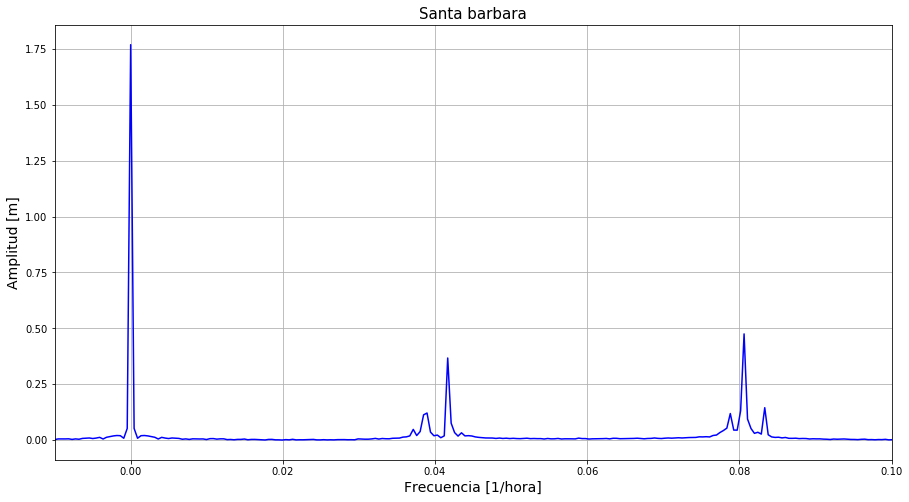

In [4]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N= 2208
# Separacion de tiempo entre cada medicion
T = 1.0
# transformada de Fourier
y= df[" Water Level"] 
yf = fft(y)
#Cambio de variable de tiempo a uno de frecuencias.
xf = fftfreq(N,T)
xf = fftshift(xf)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot = fftshift(yf)

#grafica de lo obtenido con la transformada de Fourier
import matplotlib.pyplot as plt
graf = plt.plot(xf, 2.0/N *abs(yplot), 'b-')
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Santa barbara', fontsize=15)


#Calando a ver si jala
#plt.text(0.0371376811594, 0.0477280435474, '$1$')


fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [5]:
a = 2*np.absolute(yf)/N 

In [6]:
print(np.where(a[:,]>0.035)) #picos mayores que 0.035m
b= a[a[:,]>0.035]
b

(array([   0,    1,   82,   84,   85,   86,   87,   92,   93,  172,  173,
        174,  175,  176,  177,  178,  179,  180,  184, 2024, 2028, 2029,
       2030, 2031, 2032, 2033, 2034, 2035, 2036, 2115, 2116, 2121, 2122,
       2123, 2124, 2126, 2207], dtype=int64),)


array([ 1.76899275,  0.05192968,  0.04772804,  0.03798489,  0.11275181,
        0.12088039,  0.03558658,  0.367064  ,  0.07538882,  0.04256561,
        0.05321195,  0.11856555,  0.04454763,  0.04420587,  0.13115144,
        0.47490584,  0.09387962,  0.0518428 ,  0.14471611,  0.14471611,
        0.0518428 ,  0.09387962,  0.47490584,  0.13115144,  0.04420587,
        0.04454763,  0.11856555,  0.05321195,  0.04256561,  0.07538882,
        0.367064  ,  0.03558658,  0.12088039,  0.11275181,  0.03798489,
        0.04772804,  0.05192968])

In [7]:
#los primeros 19, de ahí se empiezan a repetir:


In [8]:
#L
print( 'Armónico de prueba:')
print('Amplitud=',2.0*np.absolute(yf[82,]/N))
print('frecuencia=', xf[int(N/2 +82),])
print('periodo=', 1/xf[int(N/2 +82),])
print()

Armónico de prueba:
Amplitud= 0.0477280435474
frecuencia= 0.0371376811594
periodo= 26.9268292683



In [9]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# numero de datos
N = 2208
# Separacion de tiempo entre cada medicion
T = 1.0
#aplicacion de la transformada de Fourier
y = df[" Water Level"] 
yf = fft(y)
#Cambio de variable de tiempo a uno de frecuencias.
xf = fftfreq(N, T)
xf = fftshift(xf)
# Conjunto de datos dados por la transformada de fourier para graficar
yplot = fftshift(yf)

###Las alturas
A0 = np.absolute(yf[0,]/N)
A1 = 2.0*np.absolute(yf[1,]/N)
A2 = 2.0*np.absolute(yf[82,]/N)
A3 = 2.0*np.absolute(yf[84,]/N)
A4 = 2.0*np.absolute(yf[85,]/N)
A5 = 2.0*np.absolute(yf[86,]/N)
A6 = 2.0*np.absolute(yf[87,]/N)
A7 = 2.0*np.absolute(yf[92,]/N)
A8 = 2.0*np.absolute(yf[93,]/N)
A9 = 2.0*np.absolute(yf[172,]/N)
A10 = 2.0*np.absolute(yf[173,]/N)
A11 = 2.0*np.absolute(yf[174,]/N)
A12 = 2.0*np.absolute(yf[175,]/N)
A13 = 2.0*np.absolute(yf[176,]/N)
A14 = 2.0*np.absolute(yf[177,]/N)
A15 = 2.0*np.absolute(yf[178,]/N)
A16 = 2.0*np.absolute(yf[179,]/N)
A17 = 2.0*np.absolute(yf[180,]/N)
A18 = 2.0*np.absolute(yf[184,]/N)


In [10]:
#Frecuencias
fA1 = xf[int(1104 +1),]
fA2 = xf[int(1104 +82),]
fA3 = xf[int(1104 +84),]
fA4 = xf[int(1104 +85),]
fA5 = xf[int(1104 +86),]
fA6 = xf[int(1104 +87),]
fA7 = xf[int(1104 +92),]
fA8 = xf[int(1104 +93),]
fA9 = xf[int(1104 +172),]
fA10 = xf[int(1104 +173),]
fA11 = xf[int(1104 +174),]
fA12 = xf[int(1104 +175),]
fA13 = xf[int(1104 +176),]
fA14 = xf[int(1104 +177),]
fA15 = xf[int(1104 +178),]
fA16 = xf[int(1104 +179),]
fA17 = xf[int(1104 +180),]
fA18 = xf[int(1104 +184),]


In [11]:
#Fases
FSA0 = np.angle(yf[0,])
FSA1 = np.angle(yf[1,])
FSA2 = np.angle(yf[82,])
FSA3 = np.angle(yf[84,])
FSA4 = np.angle(yf[85,])
FSA5 = np.angle(yf[86,])
FSA6 = np.angle(yf[87,])
FSA7 = np.angle(yf[92,])
FSA8 = np.angle(yf[93,])
FSA9 = np.angle(yf[172,])
FSA10 = np.angle(yf[173,])
FSA11 = np.angle(yf[174,])
FSA12 = np.angle(yf[175,])
FSA13 = np.angle(yf[176,])
FSA14 = np.angle(yf[177,])
FSA15 = np.angle(yf[178,])
FSA16 = np.angle(yf[179,])
FSA17 = np.angle(yf[180,])
FSA18 = np.angle(yf[184,])

In [12]:
df["Date Time"]= pd.to_datetime(df["Date Time"], format = '%Y %m %d %H:%M:')

In [13]:
df.head(),df.tail()

(            Date Time   Water Level   Sigma   I   L 
 0 2016-05-01 00:00:00         1.180   0.012   0    0
 1 2016-05-01 01:00:00         1.230   0.022   0    0
 2 2016-05-01 02:00:00         1.262   0.016   0    0
 3 2016-05-01 03:00:00         1.178   0.018   0    0
 4 2016-05-01 04:00:00         1.046   0.015   0    0,
                Date Time   Water Level   Sigma   I   L 
 2203 2016-07-31 19:00:00         0.991   0.007   0    0
 2204 2016-07-31 20:00:00         0.769   0.009   0    0
 2205 2016-07-31 21:00:00         0.719   0.005   0    0
 2206 2016-07-31 22:00:00         0.724   0.007   0    0
 2207 2016-07-31 23:00:00         0.925   0.013   0    0)

In [14]:
z = np.arange(0.0, 2207.0, 1.0)

In [15]:
df['T'] =  pd.Series(z, index =None)
df.head(3)

,Date Time,Water Level,Sigma,I,L,T
0,2016-05-01 00:00:00,1.180,0.012,0,0,0.0
1,2016-05-01 01:00:00,1.230,0.022,0,0,1.0
2,2016-05-01 02:00:00,1.262,0.016,0,0,2.0


In [16]:
#Aproximacion para la marea 
w= 2.0*np.pi
def f(t):
    return A0 + (A1*np.cos(w*fA1*t+FSA1) + A2*np.cos(w*fA2 *t+FSA2) 
                   + A3*np.cos(w*fA3*t+FSA3) + A4*np.cos(w*fA4*t+FSA4) 
                   + A5*np.cos(w*fA5*t+FSA5) + A6*np.cos(w*fA6*t+FSA6) 
                   + A7*np.cos(w*fA7*t+FSA7) + A8*np.cos(w*fA8*t+FSA8) 
                   + A9*np.cos(w*fA9*t+FSA9) + A10*np.cos(w*fA10*t+FSA10)
                   + A11*np.cos(w*fA11*t+FSA11)+ A12*np.cos(w*fA12*t+FSA12)
                   + A13*np.cos(w*fA13*t+FSA13)+ A14*np.cos(w*fA14*t+FSA14)
                   + A15*np.cos(w*fA15*t+FSA15)+ A16*np.cos(w*fA16*t+FSA16)
                   + A17*np.cos(w*fA17*t+FSA17)+ A18*np.cos(w*fA18*t+FSA18))

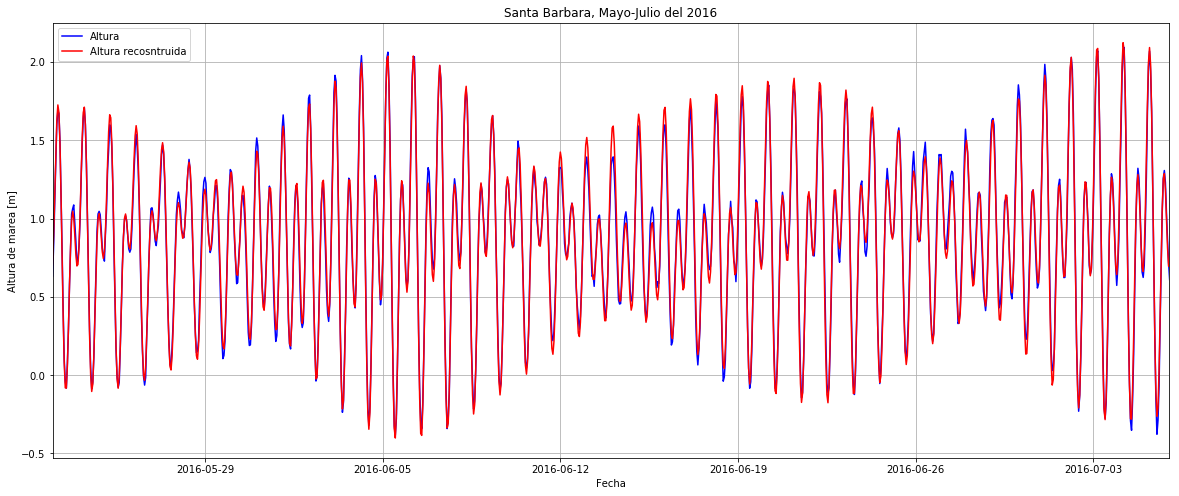

In [17]:
#mostrando la aproximación y la real
plt.plot(df[u'Date Time'], df[u' Water Level'], 'b', label ="Altura")
plt.plot(df['Date Time'], f(df['T']), 'r-', label='Altura recosntruida')
plt.xlim(pd.Timestamp('2016-05-23 00:00:00'), pd.Timestamp('2016-07-05 23:00:00'))
plt.ylabel('Altura de marea [m]')
plt.xlabel('Fecha')
plt.title('Santa Barbara, Mayo-Julio del 2016')
plt.grid(True)

plt.legend()

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

In [18]:
#error:
y_0=df[' Water Level']
y_1=f(df['T'])

In [19]:
E= np.sum(abs(y_0-y_1)**2) / np.sum(np.abs(y_0)**2)
E

0.01047060370067541

In [20]:
#Error de 1.05%